In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load PerCX functions
import sys
sys.path.append('../src/percx/')
from percx import *

Define idealized temperature time series

In [2]:
# 200yr linear ramp-up followed by 1800yr stabilization at 3°C
dT = np.append(np.linspace(0,3,201),np.linspace(3,3,1801))
time = np.arange(0, len(dT))


Read PerCX valid parameter combinations

In [ ]:
PerCX_params = np.loadtxt("../input/PerCX_valid_params_CMIP6_ssp245.txt", skiprows=1)

Define initial permafrost carbon pool size

In [5]:
C_init = 1400

Calculate carbon loss

In [6]:
C_CO2_params = np.zeros([np.array(PerCX_params).shape[0], len(dT)])
C_CH4_params = np.zeros([np.array(PerCX_params).shape[0], len(dT)])

# Loop through parameters
for pidx in np.arange(0,np.array(PerCX_params).shape[0]):
    A_CO2, A_CH4, tau, decay = np.array(PerCX_params)[pidx,:]

    # Compute carbon loss
    C_CO2_params[pidx,:], C_CH4_params[pidx,:] = PFC_species_response(dT, time, A_CO2, A_CH4, tau, C_init, decay)

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_76900/1901140216.py:13: SyntaxWarning: invalid escape sequence '\D'
  ax2.plot(time, dT, color='black', linestyle='dashed', label='$\Delta$T')
/var/folders/mt/vkb75n9d7kx45p7qhp1fc52r0000gn/T/ipykernel_76900/1901140216.py:19: SyntaxWarning: invalid escape sequence '\D'
  ax2.set_ylabel('$\Delta$T (°C)')


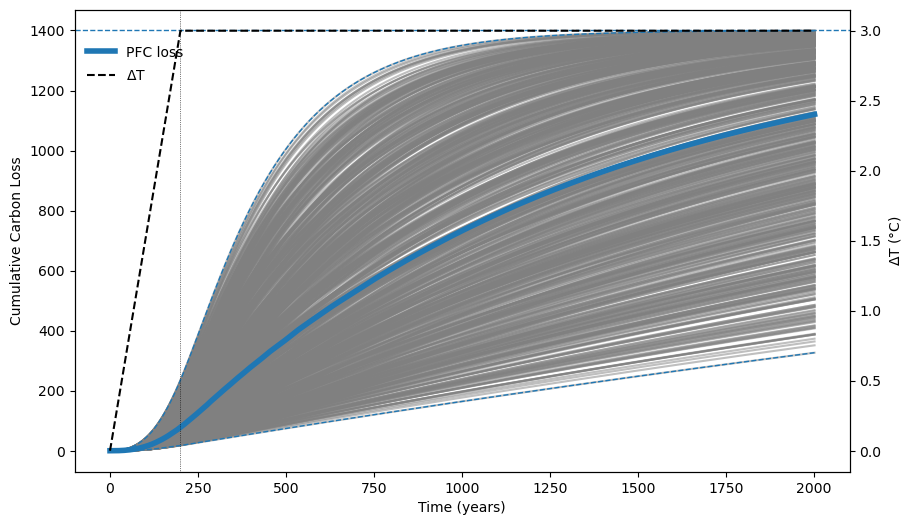

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()


for i in np.arange(0,np.array(PerCX_params).shape[0]):
    ax.plot(time, np.cumsum(C_CO2_params[i,:] + C_CH4_params[i,:]), color="gray", alpha=0.5)
ax.plot(time, np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,1),50,0), color="tab:blue", lw=4, label="PFC loss")
ax.plot(time, np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,1),0,0), color="tab:blue", lw=1, linestyle="--")
ax.plot(time, np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,1),100,0), color="tab:blue", lw=1, linestyle="--")
#ax.plot(time, np.cumsum(C_CO2_params[pfit,:] + C_CH4_params[pfit,:]), color="red", alpha=1)
#ax.fill_between(time, np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,0),25,0), np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,0),75,0), color="tab:blue", alpha=0.5)

ax2.plot(time, dT, color='black', linestyle='dashed', label='$\Delta$T')
ax.axvline(200, color='black', lw=0.5, linestyle=":")
ax.axhline(1400, color='tab:blue', lw=1, linestyle="--")

ax.set_xlabel('Time (years)')
ax.set_ylabel('Cumulative Carbon Loss')
ax2.set_ylabel('$\Delta$T (°C)')

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=[0,0.95])
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=[0,0.90])
#ax1.set_title('Permafrost Carbon Loss Response to Temperature Change (Fitted)')

In [16]:
np.nanpercentile(np.cumsum(C_CO2_params + C_CH4_params,1),50,0)[200]

np.float64(77.91245341442772)